In [602]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [603]:
import os
os.chdir("..")

In [604]:
import deepsvg
from deepsvg.svglib.geom import Point
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.svg_path import SVGPath
from deepsvg.svglib.utils import to_gif

from deepsvg.difflib.tensor import SVGTensor
from deepsvg.difflib.utils import *
from deepsvg.difflib.loss import *

In [605]:
import random
import torch.optim as optim
import IPython.display as ipd
from moviepy.editor import ImageClip, concatenate_videoclips, ipython_display

Load a target SVG and apply the standard pre-processing.

In [606]:
from deepsvg.svglib.geom import *

In [635]:
road = SVG.load_svg("/data/saeed-data/rfailure/col_train_augmented_svg/0.svg") #1082_e4

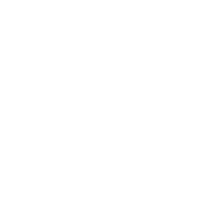

In [636]:
road.draw()  # EMPTY

In [637]:
road

SVG[Bbox(0.0 0.0 468.0 468.0)](
	SVGPathGroup(SVGPath(M[P(0.0, 0.0), P(2485.0, 4670.0)] C[P(2485.0, 4670.0), P(2482.0, 4665.0), P(2479.0, 4616.0), P(2480.0, 4563.0)] C[P(2480.0, 4563.0), P(2482.0, 4414.0), P(2482.0, 4410.0), P(2491.0, 4410.0)] C[P(2491.0, 4410.0), P(2496.0, 4410.0), P(2500.0, 4401.0), P(2500.0, 4391.0)] C[P(2500.0, 4391.0), P(2500.0, 4380.0), P(2505.0, 4368.0), P(2510.0, 4365.0)] C[P(2510.0, 4365.0), P(2516.0, 4362.0), P(2520.0, 4351.0), P(2520.0, 4341.0)] C[P(2520.0, 4341.0), P(2520.0, 4315.0), P(2592.0, 4211.0), P(2645.0, 4159.0)] C[P(2645.0, 4159.0), P(2685.0, 4120.0), P(2810.0, 4043.0), P(2810.0, 4057.0)] C[P(2810.0, 4057.0), P(2810.0, 4060.0), P(2816.0, 4058.0), P(2823.0, 4052.0)] C[P(2823.0, 4052.0), P(2829.0, 4047.0), P(2851.0, 4039.0), P(2870.0, 4034.0)] C[P(2870.0, 4034.0), P(2889.0, 4030.0), P(2910.0, 4025.0), P(2915.0, 4023.0)] C[P(2915.0, 4023.0), P(2926.0, 4020.0), P(3035.0, 3992.0), P(3060.0, 3986.0)] C[P(3060.0, 3986.0), P(3068.0, 3983.0), P(3087.0, 3977

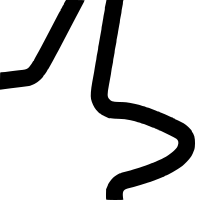

In [638]:
road2 = road.copy().zoom(np.array([0.1, 0.1]), Point(23.4,23.4)).normalize()#.translate(Point(-210.60000610351562, -257.3999938964844))#.normalize()
road2.draw()

In [639]:
road2

SVG[Bbox(0.0 0.0 24.0 24.0)](
	SVGPathGroup(SVGPath(M[P(0.0, 0.0), P(12.743589401245117, 23.948719024658203)] C[P(12.743589401245117, 23.948719024658203), P(12.728204727172852, 23.923076629638672), P(12.712820053100586, 23.671794891357422), P(12.717948913574219, 23.399999618530273)] C[P(12.717948913574219, 23.399999618530273), P(12.728204727172852, 22.63589859008789), P(12.728204727172852, 22.615385055541992), P(12.774358749389648, 22.615385055541992)] C[P(12.774358749389648, 22.615385055541992), P(12.799999237060547, 22.615385055541992), P(12.820512771606445, 22.569231033325195), P(12.820512771606445, 22.517948150634766)] C[P(12.820512771606445, 22.517948150634766), P(12.820512771606445, 22.461538314819336), P(12.84615421295166, 22.399999618530273), P(12.871794700622559, 22.38461685180664)] C[P(12.871794700622559, 22.38461685180664), P(12.90256404876709, 22.369230270385742), P(12.923076629638672, 22.312820434570312), P(12.923076629638672, 22.261539459228516)] C[P(12.923076629638672, 2

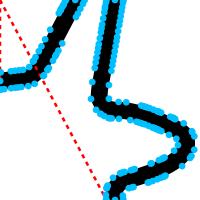

In [654]:
road2.draw(with_points=True)

In [659]:
road3 = road2.copy().zoom(0.9).canonicalize().simplify_heuristic(tolerance=0.01)

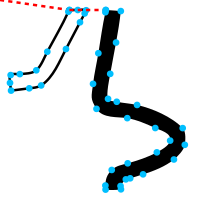

In [660]:
road3[0].fill=False
road3.draw(with_points=True, fill=False)

In [372]:
path.scale(np.array([0.8, 1.2]));

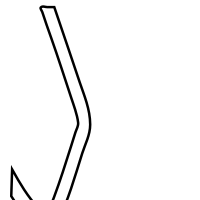

In [373]:
path.draw()

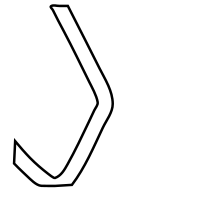

In [357]:
path = road3[0][0].copy()
path.draw()

In [358]:
jitter = Point(0.2,0.2)#None

for c in path:
    
    if jitter:
        c.start_pos.translate(jitter)
    
    
    if isinstance(c, deepsvg.svglib.svg_command.SVGCommandBezier):
        c.control1.translate(jitter)
        c.control2.translate(jitter)
    
    #jitter = Point(random.random() * 0.2, random.random() * 0.2)
    #c.end_pos.translate(jitter)

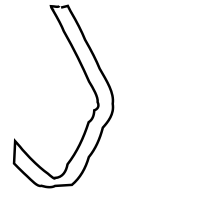

In [359]:
path.draw()

In [276]:
base_path = '/data/saeed-data/rfailure/'
input_path = base_path + 'col_train_augmented_svg/'
output_path = base_path + 'deepsvg/dataset/GYM_tensor_0.9/'
meta_file_addr = base_path + "deepsvg/dataset/GYM_meta_0.9.csv"

platform='GYM'
category='GYM'
subcategory='GYM'
#a=[i,platform,total_len,nb_groups,len_groups,max_len_group,category,subcategory]

svg_list = os.listdir(input_path) 

with open(meta_file_addr, "wb") as f:
    f.write(b"id,platform,total_len,nb_groups,len_groups,max_len_group,category,subcategory \n")

for i in svg_list:
    road = SVG.load_svg(input_path+i)
    road2 = road.copy().zoom(np.array([0.1, 0.1]), Point(23.4,23.4)).normalize()
    road3 = road2.copy().zoom(0.9).canonicalize().simplify_heuristic(tolerance=0.01)
    data = {
        "tensors": [SVG.to_tensor(road3, concat_groups=False)],
        "fillings": road3.to_fillings(),
    }
    with open(output_path+i.split('.svg')[0]+'.pkl', 'wb') as f:
        pk.dump(data, f)
    print(i+' finished')
    
    
    # mata_file
    g_l = []
    for ii in road3.svg_path_groups:
        l = ii.total_len()
        g_l.append(l)
    g_l_max = max(g_l)
    a=[i.split('.svg')[0], platform, str(road3.total_length()), len(road3.svg_path_groups), "\""+str(g_l)+"\"", g_l_max, platform, platform]
    with open(meta_file_addr, "ab") as f:
        np.savetxt(f, np.asarray(a).reshape((1,-1)), delimiter=",", fmt="%s")
           

0.svg finished
0_d1.svg finished
0_d2.svg finished
0_d3.svg finished
0_d4.svg finished
0_e1.svg finished
0_e2.svg finished
0_e3.svg finished
0_e4.svg finished
1.svg finished
10.svg finished
100.svg finished
1000.svg finished
1000_d1.svg finished
1000_d2.svg finished
1000_d3.svg finished
1000_d4.svg finished
1000_e1.svg finished
1000_e2.svg finished
1000_e3.svg finished
1000_e4.svg finished
1001.svg finished
1001_d1.svg finished
1001_d2.svg finished
1001_d3.svg finished
1001_d4.svg finished
1001_e1.svg finished
1001_e2.svg finished
1001_e3.svg finished
1001_e4.svg finished
1002.svg finished
1002_d1.svg finished
1002_d2.svg finished
1002_d3.svg finished
1002_d4.svg finished
1002_e1.svg finished
1002_e2.svg finished
1002_e3.svg finished
1002_e4.svg finished
1003.svg finished
1003_d1.svg finished
1003_d2.svg finished
1003_d3.svg finished
1003_d4.svg finished
1003_e1.svg finished
1003_e2.svg finished
1003_e3.svg finished
1003_e4.svg finished
1004.svg finished
1004_d1.svg finished
1004_d2.sv

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4745_d4.svg finished
4745_e1.svg finished
4745_e2.svg finished
4745_e3.svg finished
4745_e4.svg finished
4746.svg finished
4746_d1.svg finished
4746_d2.svg finished
4746_d3.svg finished
4746_d4.svg finished
4746_e1.svg finished
4746_e2.svg finished
4746_e3.svg finished
4746_e4.svg finished
4747.svg finished
4747_d1.svg finished
4747_d2.svg finished
4747_d3.svg finished
4747_d4.svg finished
4747_e1.svg finished
4747_e2.svg finished
4747_e3.svg finished
4747_e4.svg finished
4748.svg finished
4748_d1.svg finished
4748_d2.svg finished
4748_d3.svg finished
4748_d4.svg finished
4748_e1.svg finished
4748_e2.svg finished
4748_e3.svg finished
4748_e4.svg finished
4749.svg finished
4749_d1.svg finished
4749_d2.svg finished
4749_d3.svg finished
4749_d4.svg finished
4749_e1.svg finished
4749_e2.svg finished
4749_e3.svg finished
4749_e4.svg finished
474_d1.svg finished
474_d2.svg finished
474_d3.svg finished
474_d4.svg finished
474_e1.svg finished
474_e2.svg finished
474_e3.svg finished
474_e4.svg 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



7924_d1.svg finished
7924_d2.svg finished
7924_d3.svg finished
7924_d4.svg finished
7924_e1.svg finished
7924_e2.svg finished
7924_e3.svg finished
7924_e4.svg finished
7925.svg finished
7925_d1.svg finished
7925_d2.svg finished
7925_d3.svg finished
7925_d4.svg finished
7925_e1.svg finished
7925_e2.svg finished
7925_e3.svg finished
7925_e4.svg finished
7926.svg finished
7926_d1.svg finished
7926_d2.svg finished
7926_d3.svg finished
7926_d4.svg finished
7926_e1.svg finished
7926_e2.svg finished
7926_e3.svg finished
7926_e4.svg finished
7927.svg finished
7927_d1.svg finished
7927_d2.svg finished
7927_d3.svg finished
7927_d4.svg finished
7927_e1.svg finished
7927_e2.svg finished
7927_e3.svg finished
7927_e4.svg finished
7928.svg finished
7928_d1.svg finished
7928_d2.svg finished
7928_d3.svg finished
7928_d4.svg finished
7928_e1.svg finished
7928_e2.svg finished
7928_e3.svg finished
7928_e4.svg finished
7929.svg finished
7929_d1.svg finished
7929_d2.svg finished
7929_d3.svg finished
7929_d4

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [633]:
MAX_NUM_GROUPS = 8 #8
PAD_VAL = -1
MAX_SEQ_LEN = 30 
MAX_TOTAL_LEN = MAX_NUM_GROUPS * MAX_SEQ_LEN

def get_data(t_sep, fillings):
    res = {}
    model_args = ['commands', 'args', 'commands', 'args'] #,'tensor_grouped']
    
    t_sep = t_sep[0]
    fillings = fillings[0]
    
    t_sep_copy = t_sep.copy()
    fillings_copy = fillings.copy()
    t_sep = []
    fillings = []
    for tt, ff in zip(t_sep_copy, fillings_copy):
        if ((tt<0)&(tt!=-1)).any():
            pass
        else:
            t_sep.append(tt)
            fillings.append(ff)
    
    pad_len = max(MAX_NUM_GROUPS - len(t_sep), 0)

    t_sep.extend([torch.empty(0, 14)] * pad_len)
    fillings.extend([0] * pad_len)


    t_grouped = [SVGTensor.from_data(torch.cat(t_sep, dim=0), PAD_VAL=PAD_VAL).add_eos().add_sos().pad(
        seq_len=MAX_TOTAL_LEN + 2)]
        
    t_sep = [SVGTensor.from_data(t, PAD_VAL=PAD_VAL, filling=f).add_eos().add_sos().pad(seq_len=MAX_SEQ_LEN + 2) for
             t, f in zip(t_sep, fillings)]
    for arg in set(model_args):
        if "_grouped" in arg:
            arg_ = arg.split("_grouped")[0] 
            t_list = t_grouped 
        else:
            arg_ = arg
            t_list = t_sep

        if arg_ == "tensor":
            res[arg] = t_list

        if arg_ == "commands":
            res[arg] = torch.stack([t.cmds() for t in t_list])

        if arg_ == "args_rel":
            res[arg] = torch.stack([t.get_relative_args() for t in t_list])
        if arg_ == "args":
            res[arg] = torch.stack([t.args() for t in t_list])

    if "filling" in model_args:
        res["filling"] = torch.stack([torch.tensor(t.filling) for t in t_sep]).unsqueeze(-1)

    if "label" in model_args:
        res["label"] = label

    return res

In [634]:
import pdb

road = SVG.load_svg('/home/bahari/road_single_127_11.svg')
road2 = road.copy().zoom(np.array([0.1, 0.1]), Point(23.4,23.4)).normalize()
g_l = [ii.total_len() for ii in road2.svg_path_groups]
g_l_max = max(g_l)
rlist = [pa for ind, pa in enumerate(road2.svg_path_groups) if g_l[ind]<0.9*g_l_max]
road2.rmv_path_groups(rlist)
road3 = road2.copy().zoom(0.9).simplify_heuristic(tolerance=0.1)

data_ = {
    "tensors": [SVG.to_tensor(road3, concat_groups=False)],
    "fillings": [road3.to_fillings()],
}
data_ = get_data(data_["tensors"], data_["fillings"])
print((data_['args'][data_['args']<0]!=-1).any())

tensor(False)
